<a href="https://colab.research.google.com/github/JasOlean/LearnPytorch/blob/main/JH_02_pytorch_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another.



#  1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f'First 5 samples of X: {X[:5]}')
print(f'First 5 samples of y: {y[:5]}')

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# make dataframe of circle data
import pandas as pd 
circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


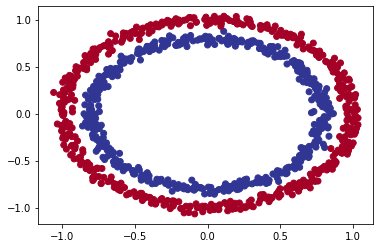

In [ ]:
#visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c =  y,
            cmap= plt.cm.RdYlBu);

###1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#view the first example of features and labels
X_sample = X[0]
y_sample =  y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shape  for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape  for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [ ]:
import torch 
torch.__version__

'1.12.0+cu113'

In [ ]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
type(X),type(y), X.dtype, y.dtype
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [ ]:
#split data into train and test sets
from sklearn.model_selection import  train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2, # 0.2 = 20 % of data will be test
                                                   random_state = 42)

In [ ]:
len(X_train), len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

# 2. Building a model

* to classify blue and red dots

1. setup device agonistic code, so the code will run on an accelerator(GPU) if there isnoe
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss fuction  and optimizer
4. Create a training and test loop

In [ ]:
# import torch and nn
import torch 
from torch import nn 

# 1. make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

## 2. Construct a model
1. subclasses `nn.Module`
2. create 2 `nn.Linear()` layers that are capable of handling the shape of data 
3. Defines a `forward()` method that outlines the forward pass of the model 
4. Instatiate an instance of model class and send it to the target device

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

    #one way
    """
    self.two_linear_layers = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
    )
    """
   # 3. Define a forward() function 
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
    #return self.two_linear_layers(x)


In [ ]:
# 4. Instantiate an instance of model and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
 next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# replicate the model above using `nn.Sequential`
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.4943, -0.2276],
                      [-0.6579,  0.2792],
                      [ 0.1571, -0.2115],
                      [ 0.2328,  0.6009],
                      [ 0.4026, -0.6401]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6621, -0.5017,  0.2635,  0.1620, -0.3904], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3439, -0.0836, -0.2681,  0.0252,  0.3737]], device='cuda:0')),
             ('1.bias', tensor([0.2423], device='cuda:0'))])

In [ ]:
## make predictions 
model_0.eval()
with torch.inference_mode():
  untrained_pred = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_pred)}, Shape: {untrained_pred.shape}')
print(f'Length of  test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10  predictions: \n {untrained_pred[:10]}')
print(f'\nFirst 10 test labels: \n {y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of  test samples: 200, Shape: torch.Size([200, 2])

First 10  predictions: 
 tensor([[0.0955],
        [0.1968],
        [0.0965],
        [0.0941],
        [0.5197],
        [0.5782],
        [0.5281],
        [0.6185],
        [0.0787],
        [0.2083]], device='cuda:0')

First 10 test labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [ ]:
pred_label = torch.round(torch.sigmoid(untrained_pred[:10]))

In [ ]:
pred_label = pred_label.squeeze()

In [ ]:
test10 = y_test[:10].squeeze().to(device)

In [ ]:
pred_label, test10

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [ ]:
pred_label == test10

tensor([ True, False,  True, False,  True,  True, False, False,  True, False],
       device='cuda:0')

## 2.1 Setup loss function and optimizer


In [ ]:
# setup loss function
#loss_fn = nn.BCELoss()  #https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
loss_fn = nn.BCEWithLogitsLoss()  #https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

# setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
loss_fn

BCEWithLogitsLoss()

In [43]:
# calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

# 3. Train  model 
1. forward pass
2. calculate the loss
3. optimizer zero grad 
4. loss backward
5. optimizer step (update gradient descent)

## 3.1 Going from raw logits -> prediction probabilities -> prediction labels

The model outputs are going to be raw **logits**.
To convert these **logits** into prediction probabilities, use some kind of activation function (e.g sigmoid for binary, softmax for multiclass)
Then can convert to probabilities to prediction labels (e.g 1,0 or cat,dog,car)

In [ ]:
# view first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0955],
        [0.1968],
        [0.0965],
        [0.0941],
        [0.5197]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use sigmoid activation function for prediction  probability from logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5239],
        [0.5490],
        [0.5241],
        [0.5235],
        [0.6271]], device='cuda:0')

For prediction probability values, need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
#so, find the predicted labels
y_pred = torch.round(y_pred_probs)

#In  full
y_pred_label = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# check for equality
print(torch.eq(y_pred.squeeze(),y_pred_label.squeeze()))

#get rid of extra dimension
print(y_pred.squeeze())

tensor([True, True, True, True, True], device='cuda:0')
tensor([1., 1., 1., 1., 1.], device='cuda:0')


## 3.2 Building a train and test loop

In [ ]:
print(y_test.shape)
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
print(y_logits)

torch.Size([200])
tensor([[0.0955],
        [0.1968],
        [0.0965],
        [0.0941],
        [0.5197]], device='cuda:0')


In [ ]:
##Train a model
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

epochs = 100
#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#build training and evaluation loop
for epoch in range(epochs):
    ### Training  
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. calculate loss 
    #loss = loss_fn(torch.sigmoid(y_logits), y_train)  # turn logits -> pred probs -> pred labels
    loss = loss_fn(y_logits,y_train) #BCEWithLogitsLoss expects raw logits as input
  
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)
    
    # 3. optimizer zero grad 
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step (gradient descent)
    optimizer.step() 

    ## Testing
    model_0.eval()
    with torch.inference_mode():
      # 1. forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      
      # 2. calculate loss
      test_loss = loss_fn(test_logits, 
                          y_test)
      test_acc = accuracy_fn(y_true = y_test,
                            y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69417, Accuracy: 49.88% | Test loss: 0.69484, Test acc: 51.50%
Epoch: 10 | Loss: 0.69414, Accuracy: 49.75% | Test loss: 0.69482, Test acc: 50.50%
Epoch: 20 | Loss: 0.69410, Accuracy: 49.75% | Test loss: 0.69481, Test acc: 50.50%
Epoch: 30 | Loss: 0.69407, Accuracy: 49.75% | Test loss: 0.69479, Test acc: 50.50%
Epoch: 40 | Loss: 0.69403, Accuracy: 49.88% | Test loss: 0.69477, Test acc: 50.50%
Epoch: 50 | Loss: 0.69400, Accuracy: 49.88% | Test loss: 0.69476, Test acc: 50.50%
Epoch: 60 | Loss: 0.69397, Accuracy: 49.88% | Test loss: 0.69475, Test acc: 50.50%
Epoch: 70 | Loss: 0.69394, Accuracy: 49.75% | Test loss: 0.69473, Test acc: 50.50%
Epoch: 80 | Loss: 0.69392, Accuracy: 49.88% | Test loss: 0.69472, Test acc: 51.00%
Epoch: 90 | Loss: 0.69389, Accuracy: 50.00% | Test loss: 0.69471, Test acc: 51.50%


# 4. Make Predictions and evaluate the model

From the metrics it looks like the model isn't learning anything....

So, to inspect it let's make some predictions and make them visualize

Visualize, visualize ,visualize
To do so, import a function called `plot_decision_boundary()` -https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [53]:
import requests
from pathlib import Path

#download helper functions from Learn Pytorch repo 
if Path('helper_functions.py').is_file():
  print('helper_functitons.py already exists, skipping download..')
else:
  print('Download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


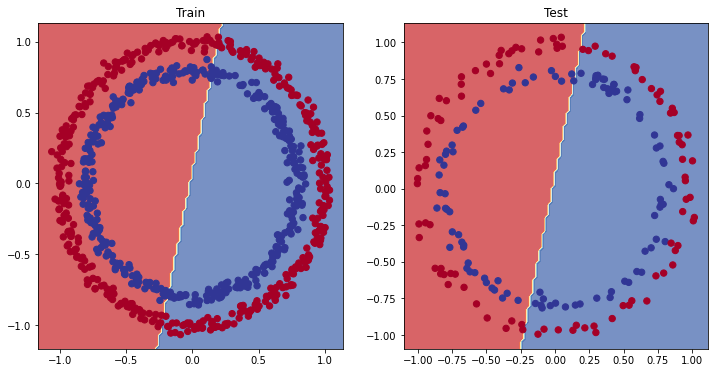

In [ ]:
#plot decison boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0,X_test,y_test)

# 5. Improving a model (from a model perspective)

* Add more layers - give model more chances to learn about patterns in data
* Add more hidden units - from  5 to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate 
* Change the loss function 

In [ ]:
## Improving a model 
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.layer_3 = nn.Linear(in_features = 10,out_features = 1)

  def forward(self,x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))


In [ ]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create loss function 
loss_fn = nn.BCEWithLogitsLoss()

#create optimizer 
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [ ]:
# train loop 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 200

X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward  pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  
  # 3. optimizer zero grad()
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ## testing
  model_1.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
  
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Train Loss: {loss:.5f}, Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}')

Epoch: 0 | Train Loss: 0.69675, Train Acc: 51.38 | Test Loss: 0.69480, Test Acc: 55.00
Epoch: 10 | Train Loss: 0.69675, Train Acc: 51.38 | Test Loss: 0.69480, Test Acc: 55.00
Epoch: 20 | Train Loss: 0.69675, Train Acc: 51.38 | Test Loss: 0.69480, Test Acc: 55.00
Epoch: 30 | Train Loss: 0.69674, Train Acc: 51.38 | Test Loss: 0.69480, Test Acc: 55.00
Epoch: 40 | Train Loss: 0.69674, Train Acc: 51.38 | Test Loss: 0.69480, Test Acc: 55.00
Epoch: 50 | Train Loss: 0.69674, Train Acc: 51.38 | Test Loss: 0.69479, Test Acc: 55.00
Epoch: 60 | Train Loss: 0.69674, Train Acc: 51.38 | Test Loss: 0.69479, Test Acc: 55.00
Epoch: 70 | Train Loss: 0.69673, Train Acc: 51.38 | Test Loss: 0.69479, Test Acc: 55.00
Epoch: 80 | Train Loss: 0.69673, Train Acc: 51.38 | Test Loss: 0.69479, Test Acc: 55.00
Epoch: 90 | Train Loss: 0.69673, Train Acc: 51.50 | Test Loss: 0.69479, Test Acc: 55.00
Epoch: 100 | Train Loss: 0.69673, Train Acc: 51.50 | Test Loss: 0.69479, Test Acc: 55.00
Epoch: 110 | Train Loss: 0.69672

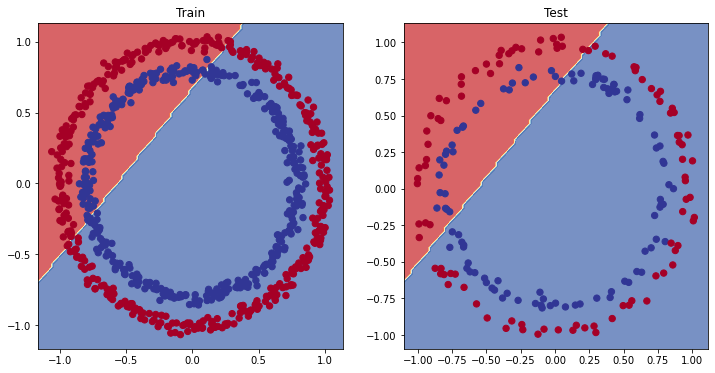

In [ ]:
#plot decison boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing  data to see if our model can fit a straight line 

One way to troubleshoot to a larger problem is to test out smaller problem.

In [ ]:
# create some initialize data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias 

#check data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# create train and test split 
data_split = int(0.8 * len(X_regression))
X_train_regr, y_train_regr = X_regression[:data_split], y_regression[:data_split]
X_test_regr, y_test_regr  = X_regression[data_split:], y_regression[data_split:]
len(X_train_regr),len(y_train_regr),len(X_test_regr),len(y_test_regr)

(80, 80, 20, 20)

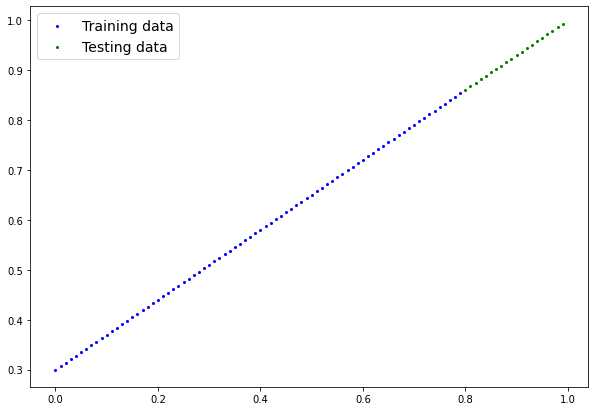

In [ ]:
plot_predictions(train_data = X_train_regr,
                 train_labels = y_train_regr,
                 test_data = X_test_regr,
                 test_labels = y_test_regr,
                 predictions = None)

In [ ]:
X_train_regr[:10], y_train_regr[:10]

### 5.2 Adjust `model_1` to fit a straight line data



In [ ]:
# same architecture as model_1 (but using nn.Sequential)

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_2.parameters(), 
                            lr = 0.01)


In [ ]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train_regr, y_train_regr = X_train_regr.to(device), y_train_regr.to(device)
X_test_regr, y_test_regr = X_test_regr.to(device),y_test_regr.to(device)

epochs = 1000

for epoch in range(epochs):
  model_2.train() 

  # 1. forward pass
  y_pred = model_2(X_train_regr)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train_regr)
  #acc = accuracy_fn(y_true = y_train_regr,
  #                  y_pred = y_pred)
  
  # 3. optimizer zero grad()
  optimizer.zero_grad()

  # 4. loss backpropagation
  loss.backward()

  # 5. optimizer step()
  optimizer.step()

  ###Testing
  model_2.eval()

  #1. forward  pass
  with torch.inference_mode():
    test_pred = model_2(X_test_regr)

    # 2. calculate loss
    test_loss = loss_fn(test_pred, y_test_regr)
    #test_acc = accuracy_fn(y_true = y_test_regr,
    #                       y_pred = test_pred)
  
  #print out
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Train: Loss: {loss:.5f} | Test: Loss: {test_loss:.5f}')

Epoch: 0 | Train: Loss: 0.75986 | Test: Loss: 0.91103
Epoch: 100 | Train: Loss: 0.02858 | Test: Loss: 0.00081
Epoch: 200 | Train: Loss: 0.02533 | Test: Loss: 0.00209
Epoch: 300 | Train: Loss: 0.02137 | Test: Loss: 0.00305
Epoch: 400 | Train: Loss: 0.01964 | Test: Loss: 0.00341
Epoch: 500 | Train: Loss: 0.01940 | Test: Loss: 0.00387
Epoch: 600 | Train: Loss: 0.01903 | Test: Loss: 0.00379
Epoch: 700 | Train: Loss: 0.01878 | Test: Loss: 0.00381
Epoch: 800 | Train: Loss: 0.01840 | Test: Loss: 0.00329
Epoch: 900 | Train: Loss: 0.01798 | Test: Loss: 0.00360


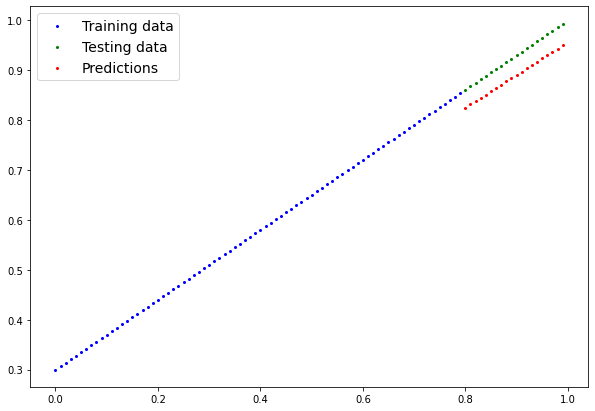

In [ ]:
# Turn on evaluation mode
model_2.eval()
#make_predictions
with torch.inference_mode():
  y_pred = model_2(X_test_regr)

plot_predictions(train_data = X_train_regr.cpu(),
                 train_labels = y_train_regr.cpu(),
                 test_data = X_test_regr.cpu(),
                 test_labels = y_test_regr.cpu(),
                 predictions = y_pred.cpu())

# 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"


##6.1 Recreating non-linear data (red and blue circles)¶


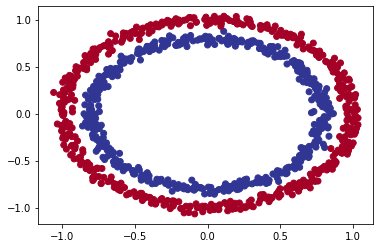

In [ ]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 

n_samples = 1000

X, y = make_circles(n_samples=1000,
                    noise = 0.03,
                    random_state=42)
plt.scatter(X[:,0],X[:,1], c= y, cmap=plt.cm.RdYlBu)


In [ ]:
#convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y, 
                                                 test_size = 0.2,
                                                 random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

## 6.2 Building a model with non-linearity

* Linear = straight lines
* non_linear = non-straight lines

In [ ]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # relu is non-linear activation function
    
  def forward(self,x):
    #where should put non-linear activation fun?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
  
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)


In [ ]:
#train model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## training
  model_3.train()

  # 1. forward pass 
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train, 
                    y_pred  = y_pred)
  
  # 3. zero grad()
  optimizer.zero_grad()
  
  # 4. loss propagation
  loss.backward()

  # 5. gradient descent
  optimizer.step() 

  ###Testing
  model_3.eval() 
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate  loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    
  #print out 
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}')

Epoch: 0 | Loss: 0.6929, Acc: 50.00 | Test Loss: 0.6932, Test Acc: 50.00
Epoch: 100 | Loss: 0.6912, Acc: 52.88 | Test Loss: 0.6910, Test Acc: 52.50
Epoch: 200 | Loss: 0.6898, Acc: 53.37 | Test Loss: 0.6894, Test Acc: 55.00
Epoch: 300 | Loss: 0.6879, Acc: 53.00 | Test Loss: 0.6872, Test Acc: 56.00
Epoch: 400 | Loss: 0.6852, Acc: 52.75 | Test Loss: 0.6841, Test Acc: 56.50
Epoch: 500 | Loss: 0.6810, Acc: 52.75 | Test Loss: 0.6794, Test Acc: 56.50
Epoch: 600 | Loss: 0.6751, Acc: 54.50 | Test Loss: 0.6729, Test Acc: 56.00
Epoch: 700 | Loss: 0.6666, Acc: 58.38 | Test Loss: 0.6632, Test Acc: 59.00
Epoch: 800 | Loss: 0.6516, Acc: 64.00 | Test Loss: 0.6476, Test Acc: 67.50
Epoch: 900 | Loss: 0.6236, Acc: 74.00 | Test Loss: 0.6215, Test Acc: 79.00


## 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
## make predictions 
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
y_pred[:5],y_test[:5]

(tensor([1., 0., 1., 0., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

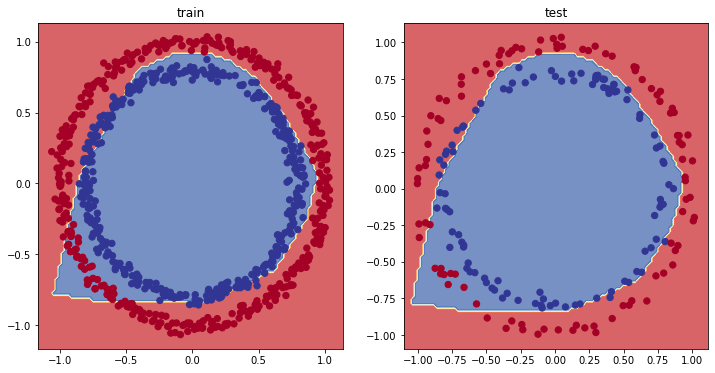

In [ ]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1,X_train, y_train)  # model_1 = no non-linearity
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_3,X_test, y_test) # model_3 = non-linearity

Challenge: can you improve model_3 to better model?

# 7. Replicating non-linear activation functions¶



In [ ]:
# create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

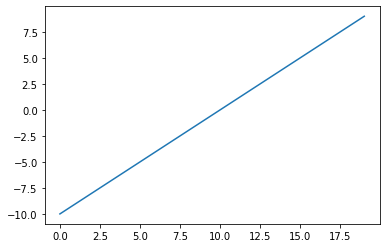

In [ ]:
# visualize a tensor
plt.plot(A)

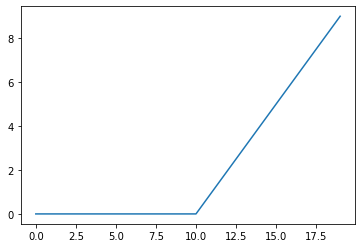

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

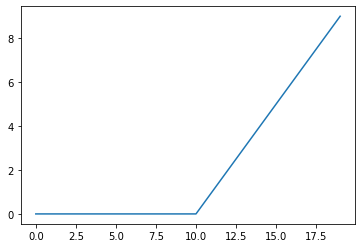

In [ ]:
# plot relu activation function
plt.plot(relu(A))

In [ ]:
# for sigmoid 
def sigmoid(x):
  return 1/ (1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

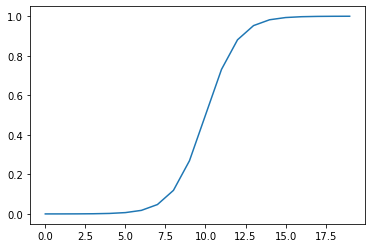

In [ ]:
plt.plot(sigmoid(A))

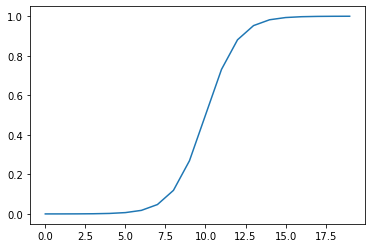

In [ ]:
plt.plot(torch.sigmoid(A))

# 8. Putting it all together with a multi-class classification problem 



## 8.1 Creating a toy multi-class dataset

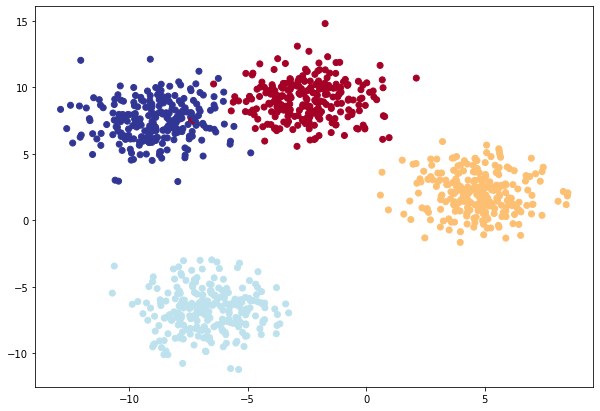

In [39]:
# import dependencies
import torch 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.model_selection  import train_test_split 

# set the hyperparameter for data creation 
num_classes = 4
num_features = 2
random_seed = 42 

# 1. create multi-class data 
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = num_features,
                            centers = num_classes,
                            cluster_std = 1.5, # give the clusters a little shake up
                            random_state = random_seed)

# 2. turn data to tensor 
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test 
X_train,X_test,y_train,y_test = train_test_split(X_blob,
                                                 y_blob,
                                                 test_size = 0.2,
                                                 random_state = random_seed)

# 4. plot data (visualize data) 
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap=plt.cm.RdYlBu)

## 8.2 Building a multi-class classification model

In [3]:
import torch
from torch import nn

In [26]:
#create agnostic code for device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [40]:
# build a classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units = 8):
      """
      initialize model:

      args:
        input_features (int): number of input features to the model
        output_features(int): number of output features (number of output classes)
        hidden_units(int): number of hidden units between layers, default 8
      
      returns:

      Example:
      """
      super().__init__()
      self.linear_layer_stack = nn.Sequential(
          nn.Linear(in_features = input_features, out_features = hidden_units),
          nn.ReLU(),
          nn.Linear(in_features = hidden_units, out_features = hidden_units),
          nn.ReLU(),
          nn.Linear(in_features = hidden_units, out_features = output_features)
      )

  def forward(self,x):
    return self.linear_layer_stack(x)

# create an instance of model and send it to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [28]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

##8.3 Creating a loss function and optimizer for a multi-class PyTorch mode

In [41]:
# create loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr = 0.1)

## 8.4 Getting prediction probabilites for a multi-class model 

logits (raw output of model) -> probs (use `torch.softmax()`) -> label

In [12]:
model_4(X_test)[:10]

tensor([[-0.1282,  0.5324,  0.3978,  0.1655],
        [ 0.4757,  0.6674,  0.4589,  1.0953],
        [ 0.1766,  1.0350,  0.9639,  0.4445],
        [-0.0806,  0.4047,  0.3419,  0.0489],
        [-0.1781,  0.4439,  0.4618,  0.7238],
        [ 0.6122,  0.7155,  0.4742,  1.3280],
        [ 0.0527,  1.0068,  0.9248,  0.3365],
        [-0.0638,  0.5237,  0.4694,  0.7431],
        [ 0.3758,  1.0943,  1.0170,  0.6869],
        [-0.1064,  0.4900,  0.4655,  0.7263]], grad_fn=<SliceBackward0>)

In [19]:
# convert logits to probs (raw testing)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test).to(device)
y_probs = torch.softmax(y_logits, dim=1)

#convert probs to labels
y_label = torch.argmax(y_probs, dim=1)
y_test, y_label

(tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
         3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
         1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
         3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
         3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
         3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
         3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
         0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
         2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
         3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
         0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
         2., 1.]),
 tensor([1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1,
         

In [20]:
##8.5 Creating a training loop and testing loop

In [48]:
## Train model 
#torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_4.train() 

  # 1. forward pass
  y_logits = model_4(X_train)
  #y_pred = torch.argmax(torch.softmax(y_logits, dim=1),dim=1)
  y_pred = torch.softmax(y_logits , dim=1).argmax(dim=1)

  # 2. calculate loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  
  # 3. zero gradient()
  optimizer.zero_grad()

  # 4. backprogation
  loss.backward()

  # 5. update gradient descent
  optimizer.step()

  ###Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
  
  if epoch % 10 == 0: 
    print(f'Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}')


Epoch: 0 | Loss: 0.0265, Acc: 99.25 | Test Loss: 0.0164, Test Acc: 99.50
Epoch: 10 | Loss: 0.0263, Acc: 99.25 | Test Loss: 0.0161, Test Acc: 99.50
Epoch: 20 | Loss: 0.0261, Acc: 99.25 | Test Loss: 0.0159, Test Acc: 99.50
Epoch: 30 | Loss: 0.0259, Acc: 99.25 | Test Loss: 0.0156, Test Acc: 99.50
Epoch: 40 | Loss: 0.0257, Acc: 99.25 | Test Loss: 0.0154, Test Acc: 99.50
Epoch: 50 | Loss: 0.0256, Acc: 99.25 | Test Loss: 0.0152, Test Acc: 99.50
Epoch: 60 | Loss: 0.0255, Acc: 99.25 | Test Loss: 0.0150, Test Acc: 99.50
Epoch: 70 | Loss: 0.0253, Acc: 99.25 | Test Loss: 0.0148, Test Acc: 99.50
Epoch: 80 | Loss: 0.0252, Acc: 99.25 | Test Loss: 0.0147, Test Acc: 99.50
Epoch: 90 | Loss: 0.0251, Acc: 99.25 | Test Loss: 0.0145, Test Acc: 99.50


## 8.6 Making and evaluating predictions 

In [51]:
##make predictions 
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)
  # Go from logits -> probs -> labels
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

# view the first 10 predcitions
y_logits[:10],y_pred[:10],y_test[:10]

(tensor([[ -1.0699,   8.2939,  -9.1524, -10.2184],
         [ -2.4755,  -7.7704,  -4.9096,   4.3691],
         [ -4.5242,  -4.9359,   4.3829,  -3.4885],
         [ -1.7748,   5.9623,  -4.7727,  -5.9021],
         [  5.3531,  -1.6346, -10.8861,  -8.3714],
         [ -3.1527,  -9.2294,  -5.7206,   5.2435],
         [ -3.9967,  -4.2325,   3.8513,  -2.8941],
         [  4.7695,  -5.1687,  -8.3257,  -4.2155],
         [ -5.7538,  -6.3046,   5.3645,  -4.4800],
         [  5.0052,  -3.8498,  -9.0407,  -5.6045]]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

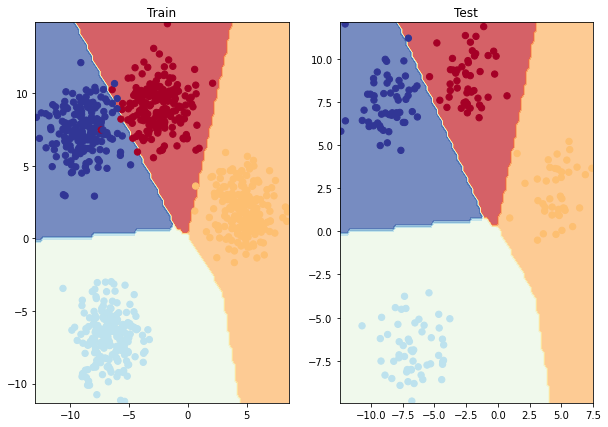

In [54]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4,X_test,y_test)

# 9. A few more classificatin metrics...

* Accuracy - how many does out model get right?
* Precision - 
* Recall -
* F1-score
* Confusion matrix 
* Classificatin report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [56]:
!pip install torchmetrics



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 4.2 MB/s 


In [58]:
from  torchmetrics import Accuracy 

#setup metric
torchmetric_acc = Accuracy()

# calculate accuracy
torchmetric_acc(y_pred,y_test)  #get same results with accuracy_fn

tensor(0.9950)